# Gartner models

In [1]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'

path_data = Path("../data") #/epidemic_models
#path_results = Path("../analysis_results/united_kingdom")

pprint(list(path_data.iterdir()))

[PosixPath('../data/israel_2019_age_pyramid.csv'),
 PosixPath('../data/lockdown'),
 PosixPath('../data/mortality_per_1000_people_femails_by_age_year.csv'),
 PosixPath('../data/mortality_2017_by_age.csv'),
 PosixPath('../data/manipulated_copy_of_mortality_2017_by_age.ods'),
 PosixPath('../data/our_world_in_data_corona'),
 PosixPath('../data/mortality_per_1000_people_2017_by_age.csv'),
 PosixPath('../data/health_office_models_runaway_stats.csv'),
 PosixPath('../data/WHO_residual_life_expectancy_by_year_group_age.csv'),
 PosixPath('../data/unemployment'),
 PosixPath('../data/mortality_per_1000_people_mails_by_age_year.csv'),
 PosixPath('../data/residual_life_expectancy_femails_age_year.csv'),
 PosixPath('../data/israel_sick.csv'),
 PosixPath('../data/WHO_residual_life_expectancy_2016_by_group_age.csv'),
 PosixPath('../data/israel_health_expenditure_each_year.csv'),
 PosixPath('../data/israel_tests_nums.csv'),
 PosixPath('../data/epidemic_models'),
 PosixPath('../data/luxembourg_active_cas

## models params

In [2]:
g_params = pd.read_csv(path_data.joinpath('gartner_parameters.csv'))
g_params

Parameter  \
0                           Generation time   
1                     Days till symptomatic   
2                        Symptomatic length   
3   Moderate-Severe length of hospital stay   
4              Length of stay on respirator   
5                        Time to detection    
6                   Time to Moderate-Severe   
7                       Time to respirator    
8                    Proportion Symptomatic   
9       Proportion of moderate-severe cases   
10           Proportion needing respirators   

                                          Explanation  \
0   Average time between generations, i.e. how lon...   
1    How long until a patient begins showing symptoms   
2                   How long is a patient symptomatic   
3   Length of hospital stay of a moderate-severe p...   
4     Length of hospital stay of a Respirator patient   
5             Average time from symptoms to detection   
6   Averate time from hospitalization to becoming ...   
7     Average time from hospitalization to respirator   
8                         Proportion of symptomactics   
9   Proportion of symptomactics cases that are hos...   
10  Proportion of symptomactics cases needing resp...   

                                               Source  \
0   Mean was extracted from cases contact data in ...   
1        Extracted from Israeli cases data/Literature   
2                                                 NaN   
3   Literature/Need to verify in Israeli hosp. cas...   
4                                          Literature   
5                   Extracted from Israeli cases data   
6          Need to verify in Israeli hosp. cases data   
7                                          Literature   
8                 Fitted to incidence data/Literature   
9   Extracted from Israeli hosp. cases data (need ...   
10                                         Literature   

                                               Value  
0                distribution=gamma(mean=3.5,sd=1.5)  
1                                             5 days  
2                                                NaN  
3                                          2-4 weeks  
4                                          1-3 weeks  
5                                             5 days  
6                                             5 days  
7                                             5 days  
8                  66% for the population as a whole  
9                                             5%-15%  
10  2%-4% of all cases for the population as a whole

### time between generations

3.5000000000000004 1.5000000000000002


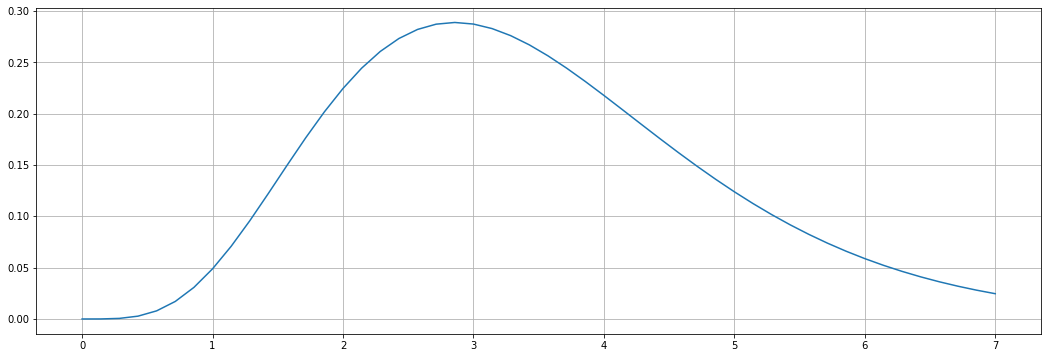

In [3]:
gamma_mean = 3.5
gamma_std = 1.5
gamma = sp.stats.gamma(gamma_mean ** 2 / gamma_std ** 2, 0, gamma_std ** 2 / gamma_mean)
print(gamma.mean(), gamma.std())
x = np.linspace(0, 7, 50)
pd.Series(index=x, data=gamma.pdf(x)).plot()

### min / max / average? not clear exactly what it is

## predictions

In [4]:
df = pd.read_csv(path_data.joinpath('gartner_predictions.csv'), skiprows=[0, 1, 2, 3, 4], index_col=[0, 1, 2, 3])
df = df.swapaxes(0, 1)
df.index.name = 'date'
df.index = pd.to_datetime(df.index)


df.columns.names = ['r', 'scenario', 'patient', 'new_active']
tmp = df.columns.to_frame(index=False)
tmp.patient = tmp.patient.astype('category').cat.rename_categories({'Moderate-Severe' : 'moderate_severe', 'Respirator' : 'respirator', 'Symptomatic' : 'symptomatic'})
tmp.scenario = tmp.scenario.astype('category').cat.rename_categories({'Max' : 'max', 'Min' : 'min', 'Average' : 'average'})
tmp.new_active = tmp.new_active.astype('category').cat.rename_categories({'New patients' : 'new', 'Active patients' : 'active'})
df.columns = pd.MultiIndex.from_frame(tmp)

df.columns


MultiIndex([( 1.2, 'average', 'moderate_severe',    'new'),
            ( 1.2, 'average', 'moderate_severe', 'active'),
            ( 1.2, 'average',      'respirator',    'new'),
            ( 1.2, 'average',      'respirator', 'active'),
            ( 1.2, 'average',     'symptomatic',    'new'),
            ( 1.2,     'max', 'moderate_severe',    'new'),
            ( 1.2,     'max', 'moderate_severe', 'active'),
            ( 1.2,     'max',      'respirator',    'new'),
            ( 1.2,     'max',      'respirator', 'active'),
            ( 1.2,     'max',     'symptomatic',    'new'),
            ( 1.2,     'min', 'moderate_severe',    'new'),
            ( 1.2,     'min', 'moderate_severe', 'active'),
            ( 1.2,     'min',      'respirator',    'new'),
            ( 1.2,     'min',      'respirator', 'active'),
            ( 1.2,     'min',     'symptomatic',    'new'),
            (1.35, 'average', 'moderate_severe',    'new'),
            (1.35, 'average', 'moderate_

In [5]:
df.dtypes

r    scenario  patient          new_active
1.2  average   moderate_severe  new           int64
                                active        int64
               respirator       new           int64
                                active        int64
               symptomatic      new           int64
                                              ...  
2.0  min       moderate_severe  new           int64
                                active        int64
               respirator       new           int64
                                active        int64
               symptomatic      new           int64
Length: 75, dtype: object

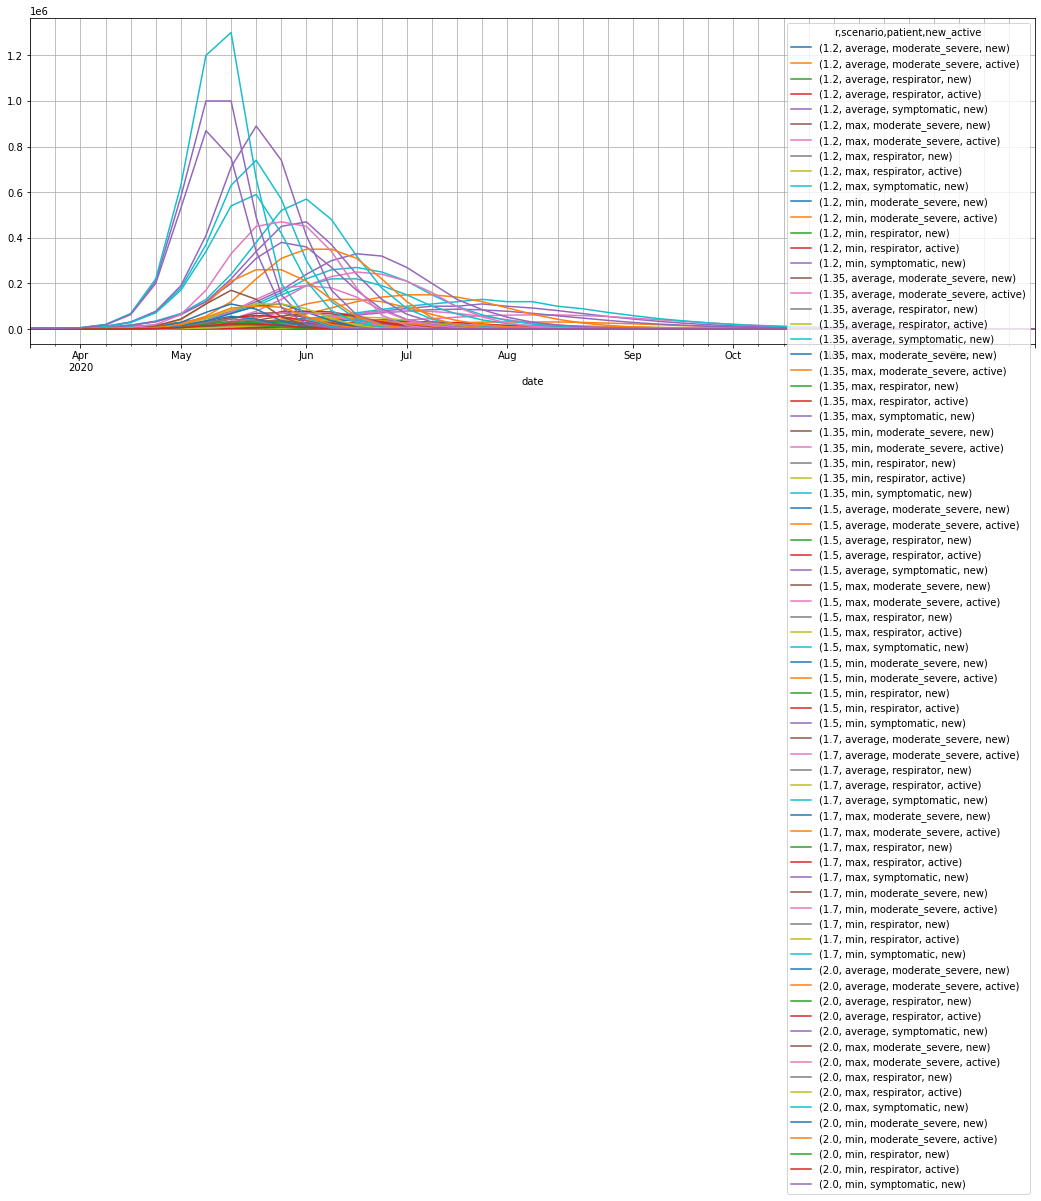

In [8]:
df.plot()

## I notice that in "symptomatic" there are only "new patiants" not active
## how do people change groups over time?

### best case

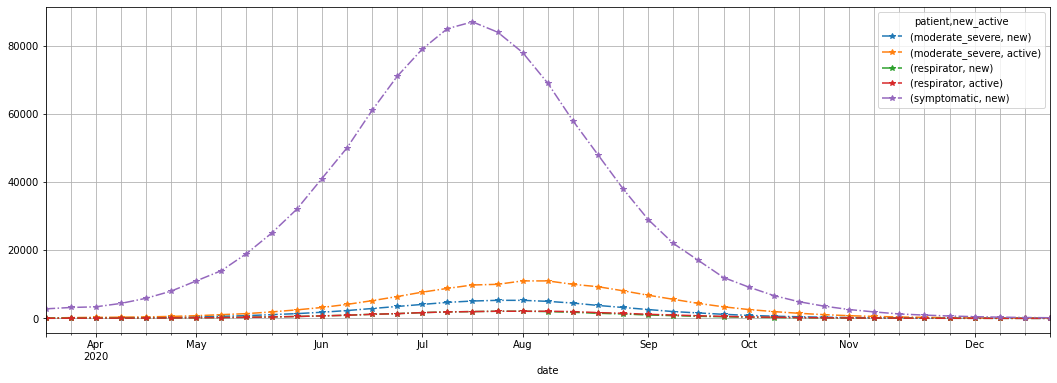

In [9]:
df.loc[:, 1.2].loc[:, 'min'].plot(linestyle='-.', marker='*')

## worst case

patient
moderate_severe     547545
respirator          145416
symptomatic        4370641
dtype: int64

patient
moderate_severe    470000
respirator         110000
dtype: int64


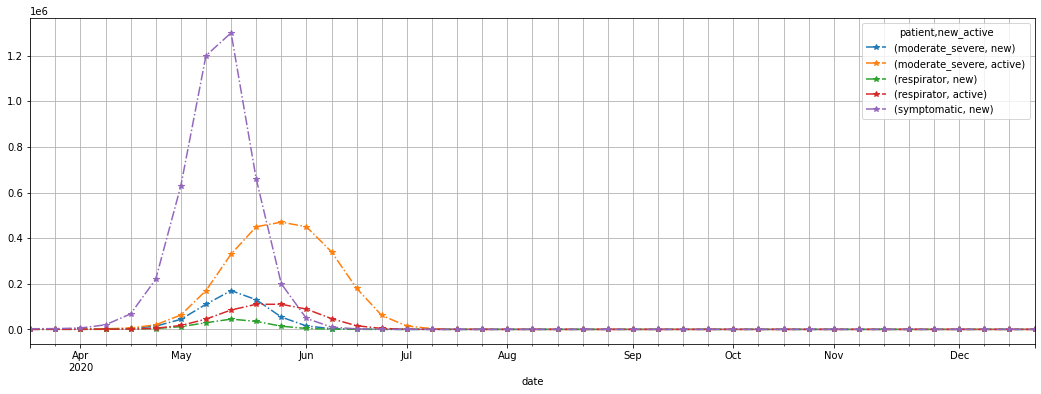

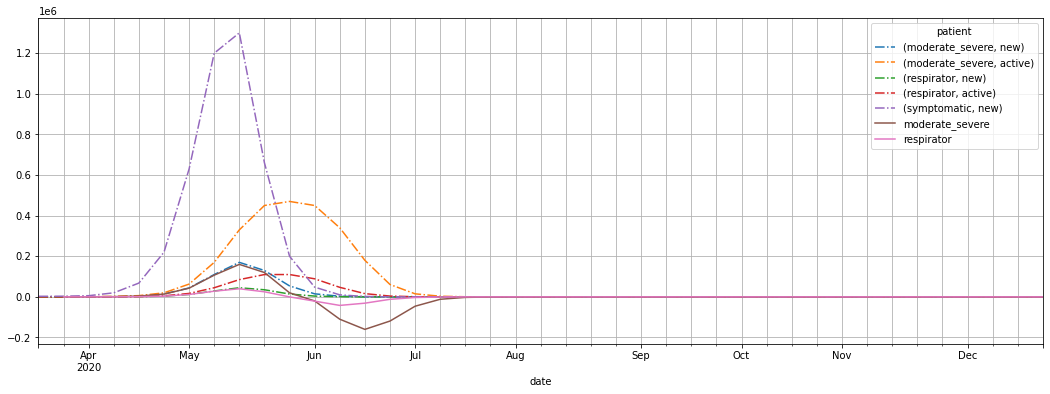

In [10]:
worst_case = df.loc[:, 2].loc[:, 'max']
worst_case.plot(linestyle='-.', marker='*')

pprint(worst_case.sum(axis=0).xs('new', level='new_active'))
print()
pprint(worst_case.max(axis=0).xs('active', level='new_active'))

ax = worst_case.plot(linestyle='-.')
worst_case.xs('active', level='new_active', axis=1).diff().plot(ax=ax)

## r=2, max-min

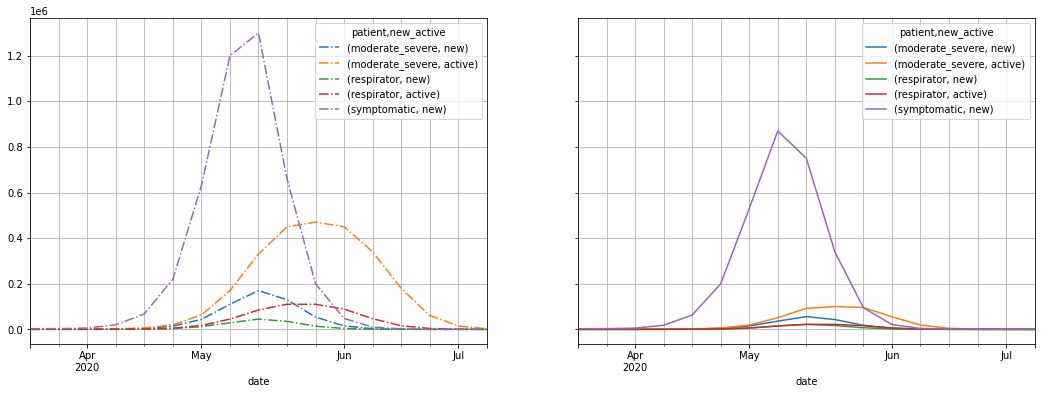

In [17]:
df_ = df.loc[:'2020-07-15']
fig, (ax_l, ax_r) = plt.subplots(1, 2, sharey=True)
df_.loc[:, 2].loc[:, 'max'].plot(ax=ax_l, linestyle='-.')
df_.loc[:, 2].loc[:, 'min'].plot(ax=ax_r)


### the beginning : should compare to known cases

In [196]:
worst_case.head()

patient    moderate_severe        respirator        symptomatic
new_active             new active        new active         new
date                                                           
2020-03-22             220    270         59     71        2800
2020-03-29             460    720        120    190        3300
2020-04-05             520   1200        140    320        5900
2020-04-12            1200   2400        310    570       20000
2020-04-19            4100   6200       1100   1500       68000

### how many symptomatic total in each scenario?

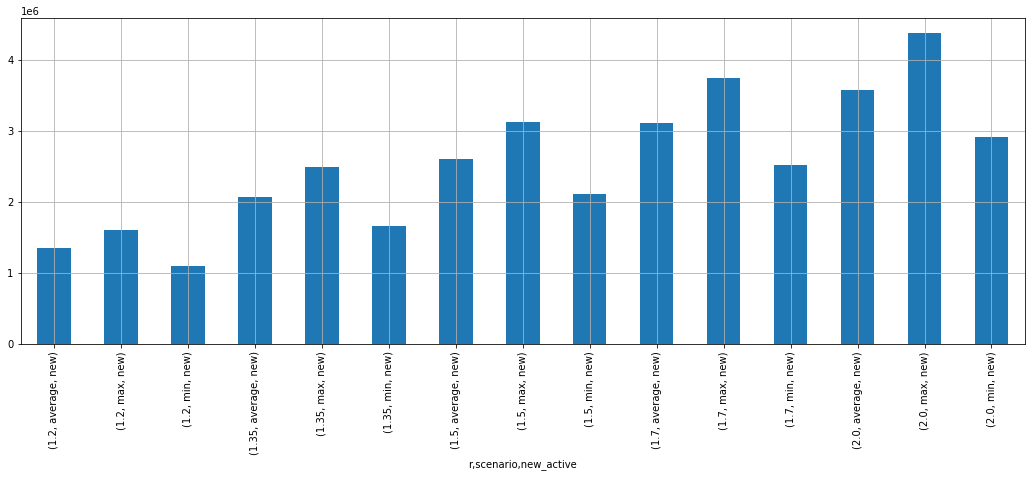

In [172]:
df.xs('symptomatic', level='patient', axis=1).sum(axis=0).plot.bar()

### only max scenario

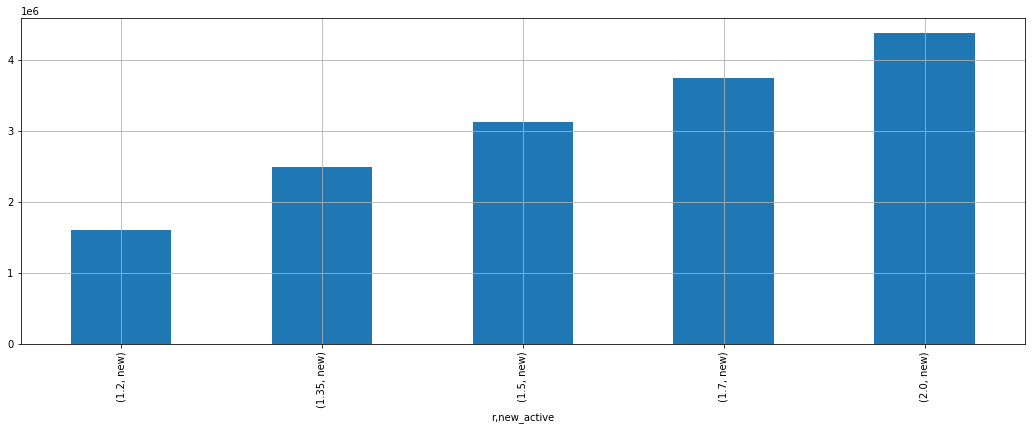

In [174]:
df.xs(('symptomatic', 'max'), level=('patient', 'scenario'), axis=1).sum(axis=0).plot.bar()

#### summing new of moderate-severe and respirator

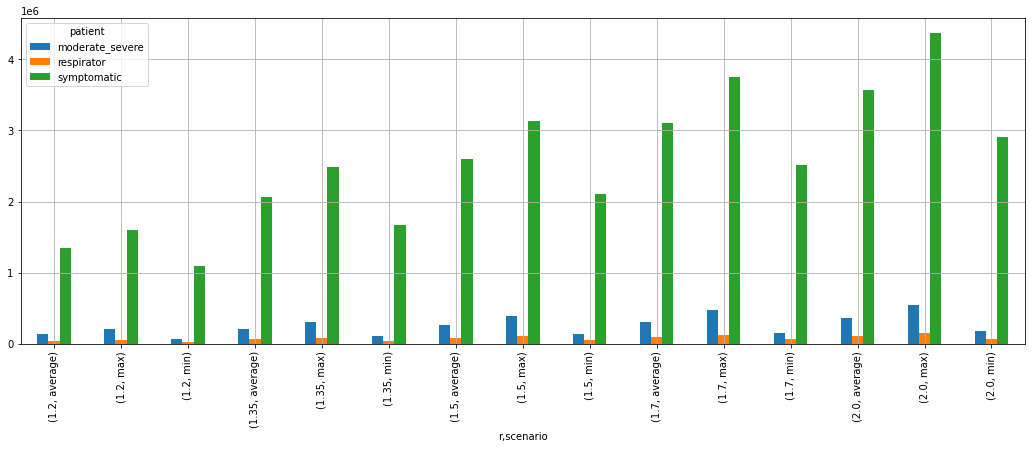

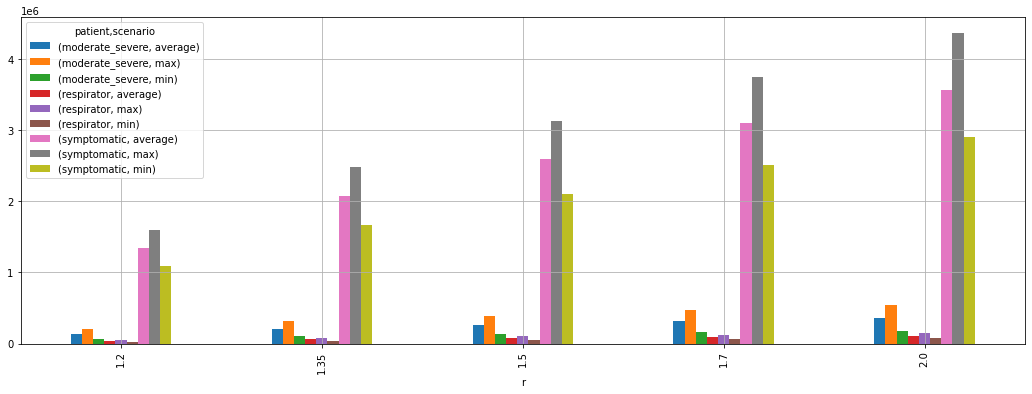

In [184]:
df.xs('new', level='new_active', axis=1).sum(axis=0).unstack().plot.bar()
df.xs('new', level='new_active', axis=1).sum(axis=0).unstack().unstack().plot.bar()

#### in the extreme scenarios, ~half the country is symptomatic. meaning ~100% encounter the Virus

### new cumsum Vs active

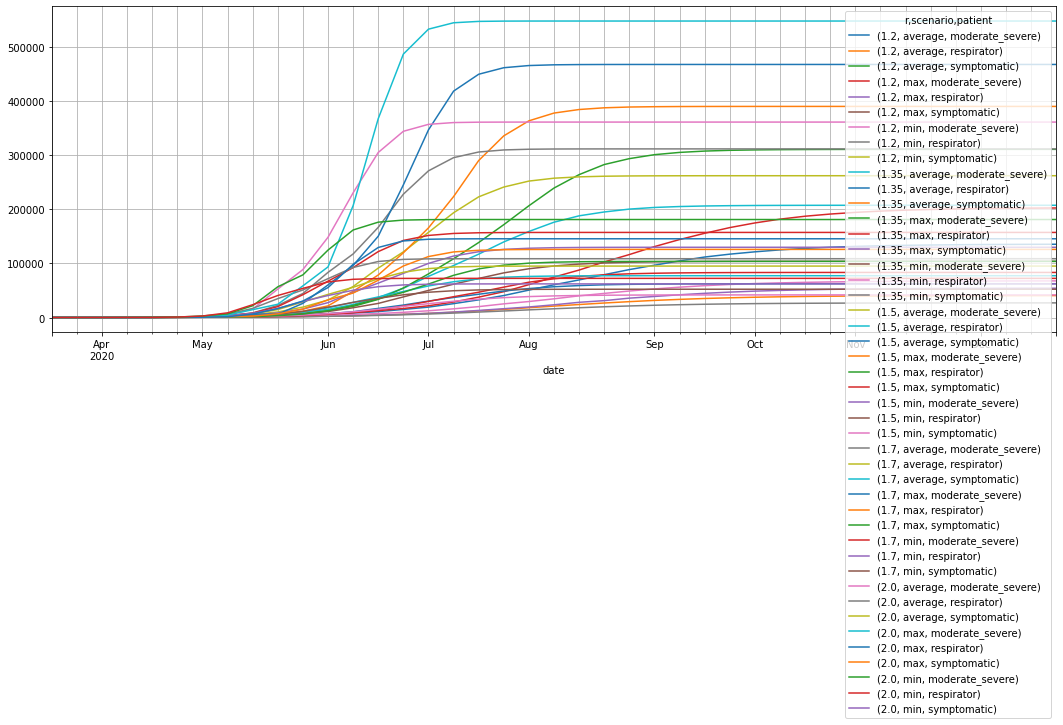

In [162]:
(df.xs('new', level='new_active', axis=1).cumsum(axis=0) - df.xs('active', level='new_active', axis=1)).plot()

In [63]:
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['font.size'] = 14



# Display gartner models 1

In [2]:
date_9_confirmed = pd.Timestamp('2020/02/29')

In [48]:
israel_tot_population = 9e6

In [3]:
def parse_gartner_1(path):
    df = pd.read_csv(path, skiprows=[0, 1, 2, 3, 4], index_col=[0, 1, 2, 3])
    df = df.swapaxes(0, 1)
    df.index.name = 'date'
    df.index = pd.to_datetime(df.index)


    df.columns.names = ['r', 'scenario', 'patient', 'new_active']
    tmp = df.columns.to_frame(index=False)
    tmp.patient = tmp.patient.astype('category').cat.rename_categories({'Moderate-Severe' : 'moderate_severe', 'Respirator' : 'respirator', 'Symptomatic' : 'symptomatic'}).astype(str)
    tmp.scenario = tmp.scenario.astype('category').cat.rename_categories({'Max' : 'max', 'Min' : 'min', 'Average' : 'average'})
    tmp.new_active = tmp.new_active.astype('category').cat.rename_categories({'New patients' : 'new', 'Active patients' : 'active'})
    df.columns = pd.MultiIndex.from_frame(tmp)
    
    return df

predictions_1 = parse_gartner_1(path_data.joinpath('epidemic_models/gartner_predictions.csv'))

In [4]:
predictions_1.columns.names

FrozenList(['r', 'scenario', 'patient', 'new_active'])

tmp = (predictions_1.xs(('active', 'moderate_severe'), level=('new_active', 'patient'), axis=1).idxmax(axis=0) - date_9_confirmed).dt.days

tmp

In [114]:
table = predictions_1.xs(('new',), level=('new_active',), axis=1).sum(level=['r', 'patient', 'scenario'], axis=1).sum(axis=0).unstack('patient')#.sum().sum())
#table.columns = table.columns.add_categories('exposed')
exposed_to_symptomatic_gartner_1 = 0.66
table['exposed'] = (table['symptomatic'] / exposed_to_symptomatic_gartner_1).astype(int)
table['exposed_ratio'] = np.round(table.exposed / israel_tot_population, 2)
#table.columns = table.columns.add_categories('dead')
dead_from_respirated_according_to_prediction_2 = 0.0092 / 0.0231
dead_from_respirated_according_to_prediction_arbitrary = 1/7 * 21600 / 20773
dead_from_exposed_de_marker = 0.003 * 1.33
table['dead'] = table['respirator'] * dead_from_respirated_according_to_prediction_2
#table['dead'] = table['exposed'] * dead_from_exposed_de_marker
table = table[['exposed_ratio', 'exposed', 'symptomatic', 'moderate_severe', 'respirator', 'dead']]
table['days_to_peak'] = (predictions_1.xs(('active', 'moderate_severe'), level=('new_active', 'patient'), axis=1).idxmax(axis=0) - date_9_confirmed).dt.days
table['days_to_finish'] = table['days_to_peak'] * 2




#table.values = 



table_1 = table
table_1.to_csv(path_results.joinpath('prediction_1.csv'))

table_1.reset_index('scenario')

patient scenario  exposed_ratio  exposed  symptomatic  moderate_severe  \
r                                                                        
1.20     average           0.23  2043348      1348610           135528   
1.20         max           0.27  2428727      1602960           202830   
1.20         min           0.18  1652863      1090890            67689   
1.35     average           0.35  3135662      2069537           207312   
1.35         max           0.42  3769669      2487982           310596   
1.35         min           0.28  2521033      1663882           103798   
1.50     average           0.44  3932890      2595708           261865   
1.50         max           0.53  4738978      3127726           389858   
1.50         min           0.35  3185915      2102704           129712   
1.70     average           0.52  4701472      3102972           311404   
1.70         max           0.63  5674522      3745185           467352   
1.70         min           0.42  3806772      2512470           157138   
2.00     average           0.60  5408924      3569890           360936   
2.00         max           0.74  6622183      4370641           547545   
2.00         min           0.49  4400089      2904059           180961   

patient  respirator          dead  days_to_peak  days_to_finish  
r                                                                
1.20          40566  16156.155844           155             310  
1.20          54204  21587.740260           162             324  
1.20          27042  10769.974026           155             310  
1.35          62427  24862.701299           127             254  
1.35          83238  33151.064935           127             254  
1.35          41759  16631.290043           120             240  
1.50          77212  30751.099567           106             212  
1.50         103676  41290.874459           113             226  
1.50          52244  20807.134199           106             212  
1.70          94995  37833.506494            99             198  
1.70         125787  50096.987013            99             198  
1.70          62110  24736.450216            92             184  
2.00         108590  43247.965368            85             170  
2.00         145416  57914.597403            92             184  
2.00          72302  28795.601732            85             170

In [115]:
def table_to_summary(table):
    summary = table.groupby('r').mean()
    summary = summary.astype(dict.fromkeys(['exposed', 'symptomatic', 'moderate_severe', 'respirator', 'dead', 'days_to_peak', 'days_to_finish'], int))
    summary.exposed_ratio = np.round(summary.exposed_ratio, 2)
    return summary

In [116]:
summary_1 = table_to_summary(table_1)
pd.DataFrame(summary_1.reset_index().values[:, ::-1])

0      1        2         3         4          5          6     7     8
0  314.0  157.0  16171.0   40604.0  135349.0  1347486.0  2041646.0  0.23  1.20
1  249.0  124.0  24881.0   62474.0  207235.0  2073800.0  3142121.0  0.35  1.35
2  216.0  108.0  30949.0   77710.0  260478.0  2608712.0  3952594.0  0.44  1.50
3  193.0   96.0  37555.0   94297.0  311964.0  3120209.0  4727588.0  0.52  1.70
4  174.0   87.0  43319.0  108769.0  363147.0  3614863.0  5477065.0  0.61  2.00

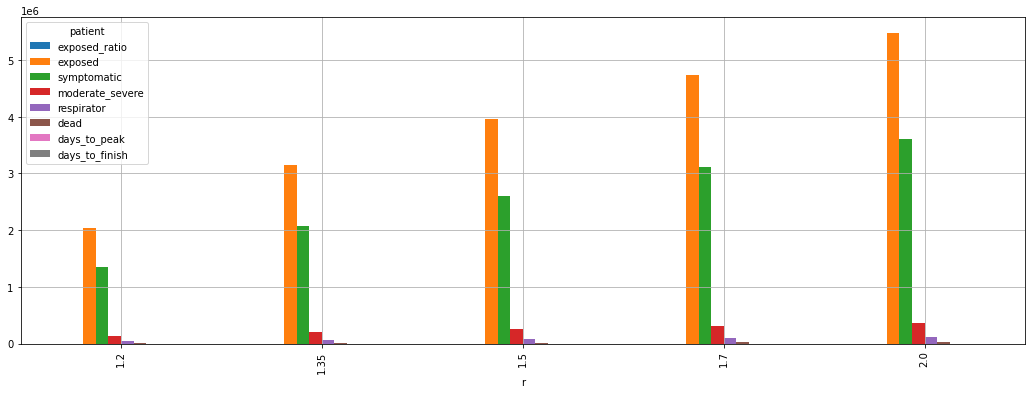

In [52]:
table_1.groupby('r').mean().plot.bar()

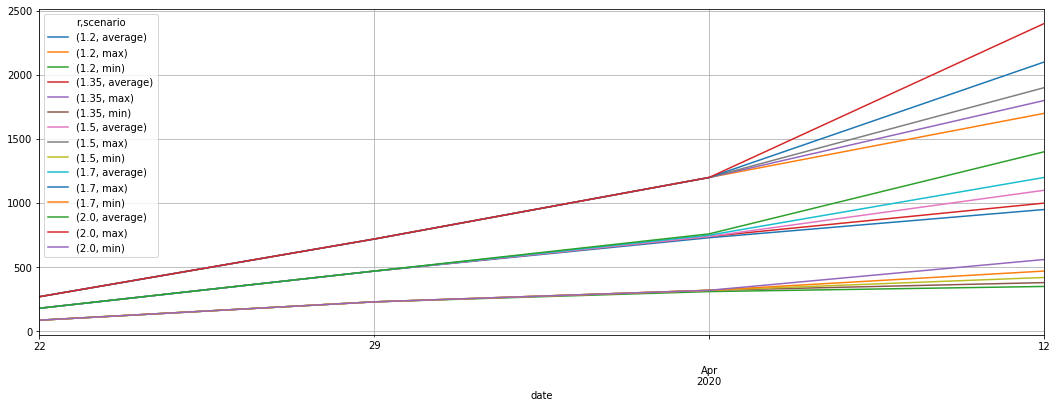

In [8]:
predictions_1[:'2020/04/15'].xs(['moderate_severe', 'active'], level=['patient', 'new_active'], axis=1).plot()

# Display gartner models 2

In [53]:
def parse_gartner_2(path):
    df = pd.read_csv(path, index_col=[0, 1, 2, 3], dayfirst=True, thousands=',')

    df = df.swapaxes(0, 1)
    df.index.name = 'date'
    df.index = pd.to_datetime(df.index, dayfirst=True)


    df.columns.names = ['r', 'proportion_detected', 'patient', 'new_active']

    tmp = df.columns.to_frame(index=False)
    tmp.patient = tmp.patient.astype('category').cat.rename_categories({'Moderate-Severe' : 'moderate_severe', 'Respirator' : 'respirator', 'Symptomatic' : 'symptomatic', 'Dead' : 'dead'}).astype(str)
    tmp.proportion_detected = np.round(tmp.proportion_detected.str.extract('(\d+)').astype(float) * 0.01, 3)
    tmp.new_active = tmp.new_active.str.replace(' patients', '').str.lower().astype('category')#.cat.rename_categories({'new patients' : 'new', 'active patients' : 'active'})
    df.columns = pd.MultiIndex.from_frame(tmp)
    
    return df
#df.columns
#df.dtypes
predictions_2 = parse_gartner_2(path_data.joinpath('epidemic_models/gartner_predictions_2.csv'))

In [10]:
predictions_2.columns.names

FrozenList(['r', 'proportion_detected', 'patient', 'new_active'])

In [67]:
path_results = Path('../analysis_results/gartner_predictions')

In [ ]:
pd.DataFrame.to

In [69]:
table = predictions_2.xs(('new',), level=('new_active',), axis=1).sum(level=['r', 'patient', 'proportion_detected'], axis=1).sum(axis=0).unstack('patient')#.sum().sum())
#table.columns = table.columns.add_categories('exposed')
table['exposed'] = np.round((table['symptomatic'] / table.index.to_frame(index=True).proportion_detected).values).astype(int)
table['exposed_ratio'] = np.round(table.exposed / israel_tot_population, 2)
table = table[['exposed_ratio', 'exposed', 'symptomatic', 'moderate_severe', 'respirator', 'dead']]

table['days_to_peak'] = (predictions_2.xs(('active', 'moderate_severe'), level=('new_active', 'patient'), axis=1).idxmax(axis=0) - date_9_confirmed).dt.days#table
table['days_to_finish'] = table['days_to_peak'] * 2
#table.values = 
#np.round(table.reset_index('proportion_detected'), 0)
table_2 = table
table_2.to_csv(path_results.joinpath('prediction_2.csv'))
table_2.reset_index('proportion_detected')

patient  proportion_detected  exposed_ratio  exposed  symptomatic  \
r                                                                   
1.20                     0.3           0.24  2190767       657230   
1.20                     0.5           0.25  2254000      1127000   
1.20                     0.7           0.26  2334571      1634200   
1.35                     0.3           0.41  3731690      1119507   
1.35                     0.5           0.42  3749548      1874774   
1.35                     0.7           0.43  3849936      2694955   
1.50                     0.3           0.54  4829723      1448917   
1.50                     0.5           0.54  4904444      2452222   
1.50                     0.7           0.55  4966490      3476543   
1.70                     0.3           0.66  5899090      1769727   
1.70                     0.5           0.66  5961574      2980787   
1.70                     0.7           0.67  6022879      4216015   
2.00                     0.3           0.78  7031167      2109350   
2.00                     0.5           0.79  7082878      3541439   
2.00                     0.7           0.79  7121179      4984825   

patient  moderate_severe  respirator   dead  days_to_peak  days_to_finish  
r                                                                          
1.20               43927       15312   6118           127             254  
1.20               74658       25991  10426           148             296  
1.20              109990       38461  15405           162             324  
1.35               73910       25882  10417           113             226  
1.35              125230       43625  17287           120             240  
1.35              181644       63186  25358           127             254  
1.50               97374       33999  13560            99             198  
1.50              161137       56433  22658           106             212  
1.50              233751       81106  32770           113             226  
1.70              118924       41463  16595            92             184  
1.70              197510       68932  27733            99             198  
1.70              284417      100106  39732            99             198  
2.00              140238       49220  19701            85             170  
2.00              232555       80652  32650            85             170  
2.00              333955      117034  46974            92             184

In [55]:
summary_2 = table_to_summary(table_2)
summary_2

patient  exposed_ratio  exposed  symptomatic  moderate_severe  respirator  \
r                                                                           
1.20              0.25  2259779      1139476            76191       26588   
1.35              0.42  3777058      1896412           126928       44231   
1.50              0.54  4900219      2459227           164087       57179   
1.70              0.66  5961181      2988843           200283       70167   
2.00              0.79  7078408      3545204           235582       82302   

patient   dead  days_to_peak  days_to_finish  
r                                             
1.20     10649           145             291  
1.35     17687           120             240  
1.50     22996           106             212  
1.70     28020            96             193  
2.00     33108            87             174

In [113]:
pd.DataFrame(summary_2.reset_index().values[:, ::-1])

0      1        2        3         4          5          6     7     8
0  291.0  145.0  10649.0  26588.0   76191.0  1139476.0  2259779.0  0.25  1.20
1  240.0  120.0  17687.0  44231.0  126928.0  1896412.0  3777058.0  0.42  1.35
2  212.0  106.0  22996.0  57179.0  164087.0  2459227.0  4900219.0  0.54  1.50
3  193.0   96.0  28020.0  70167.0  200283.0  2988843.0  5961181.0  0.66  1.70
4  174.0   87.0  33108.0  82302.0  235582.0  3545204.0  7078408.0  0.79  2.00

In [56]:
table_2.groupby('r').mean()

patient  exposed_ratio       exposed   symptomatic  moderate_severe  \
r                                                                     
1.20          0.250000  2.259779e+06  1.139477e+06     76191.666667   
1.35          0.420000  3.777058e+06  1.896412e+06    126928.000000   
1.50          0.543333  4.900219e+06  2.459227e+06    164087.333333   
1.70          0.663333  5.961181e+06  2.988843e+06    200283.666667   
2.00          0.786667  7.078408e+06  3.545205e+06    235582.666667   

patient    respirator          dead  days_to_peak  days_to_finish  
r                                                                  
1.20     26588.000000  10649.666667    145.666667      291.333333  
1.35     44231.000000  17687.333333    120.000000      240.000000  
1.50     57179.333333  22996.000000    106.000000      212.000000  
1.70     70167.000000  28020.000000     96.666667      193.333333  
2.00     82302.000000  33108.333333     87.333333      174.666667

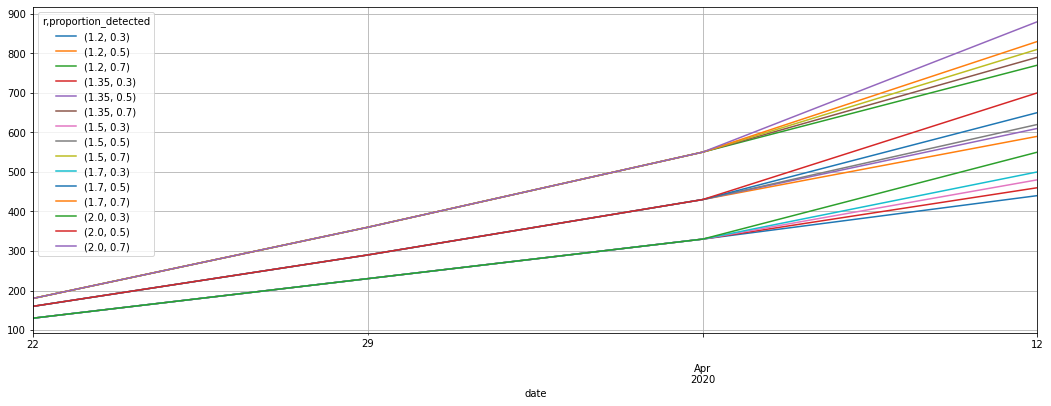

In [15]:
predictions_2[:'2020/04/15'].xs(['moderate_severe', 'active'], level=['patient', 'new_active'], axis=1).plot()

# Display data 1

In [5]:
confirmed_tsvik = pd.read_csv(Path('./../../COVID-19-Israel-data-tsvikas.git/daily_reports/total_cases.csv'), index_col=0, header=0, parse_dates=True, skiprows=[1,])

confirmed_tsvik.index = confirmed_tsvik.index.tz_localize(None).normalize()
confirmed_tsvik['date'] = confirmed_tsvik.index
#confirmed_tsvik
A = confirmed_tsvik.drop_duplicates(keep='last', subset='date')
A = A.iloc[2:]

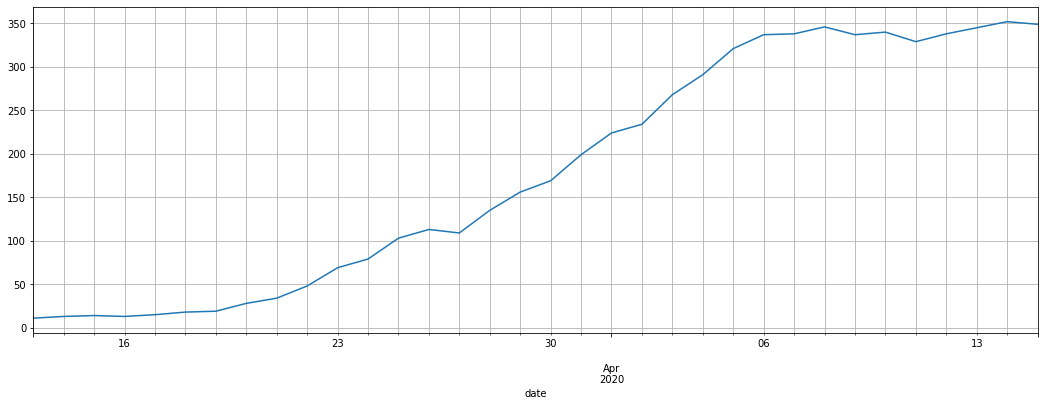

In [52]:
(A.serious + A.critical).plot()

# Display data 2

In [57]:
confirmed = pd.read_csv(Path('./../../israel-covid19-data.git/IsraelCOVID19.csv'), index_col=0, header=0, names=['cases_tot', 'cases_new', 'moderate_tot', 'severe_tot', 'dead_tot', 'recovered_tot'], parse_dates=True, dayfirst=True)

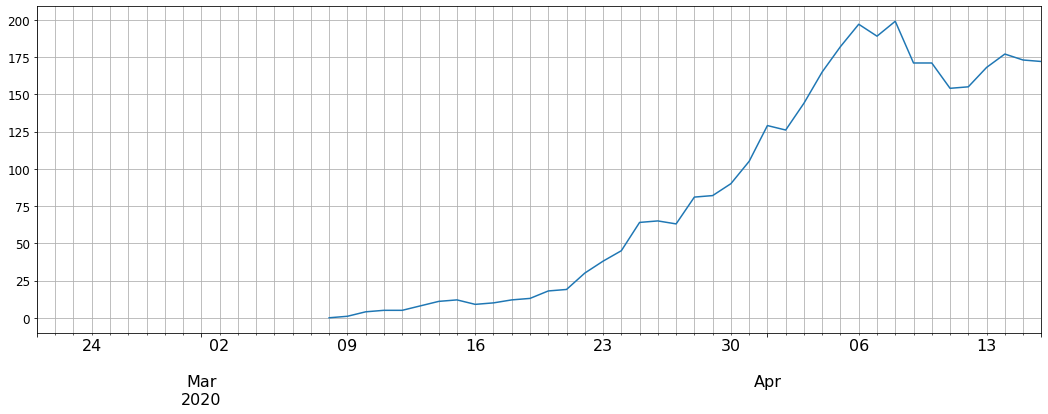

In [128]:
confirmed.moderate_tot.plot()

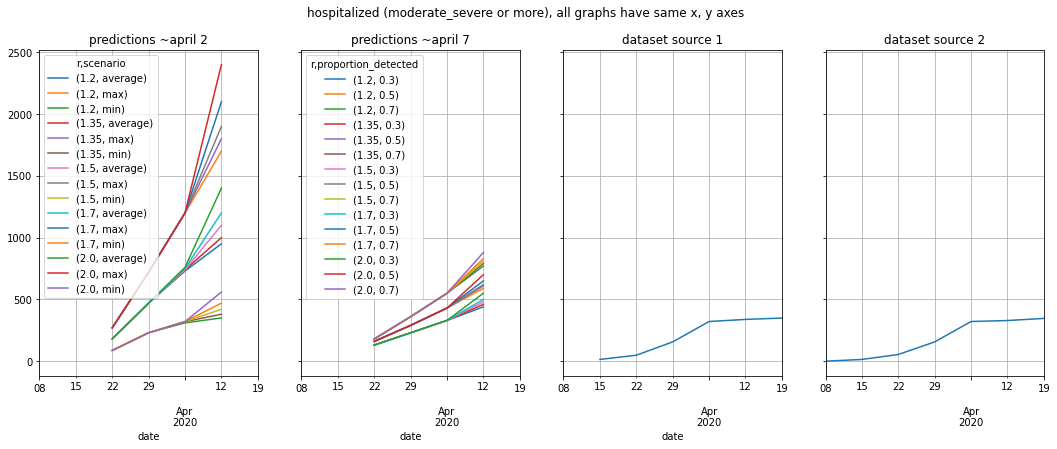

In [91]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True)
fig.suptitle('hospitalized (moderate_severe or more), all graphs have same x, y axes')
predictions_1[:'2020/04/15'].xs(['moderate_severe', 'active'], level=['patient', 'new_active'], axis=1).plot(ax=axes[0], title='predictions ~april 2')
predictions_2[:'2020/04/15'].xs(['moderate_severe', 'active'], level=['patient', 'new_active'], axis=1).plot(ax=axes[1], title='predictions ~april 7')
(A.serious + A.critical).plot(ax=axes[2], title='dataset source 1')
(confirmed.moderate_tot + confirmed.severe_tot).plot(ax=axes[3], title='dataset source 2')

In [79]:
predictions_1.xs(('symptomatic', 'new'), level=['patient', 'new_active'], axis=1).plot()

KeyError: 'dead'

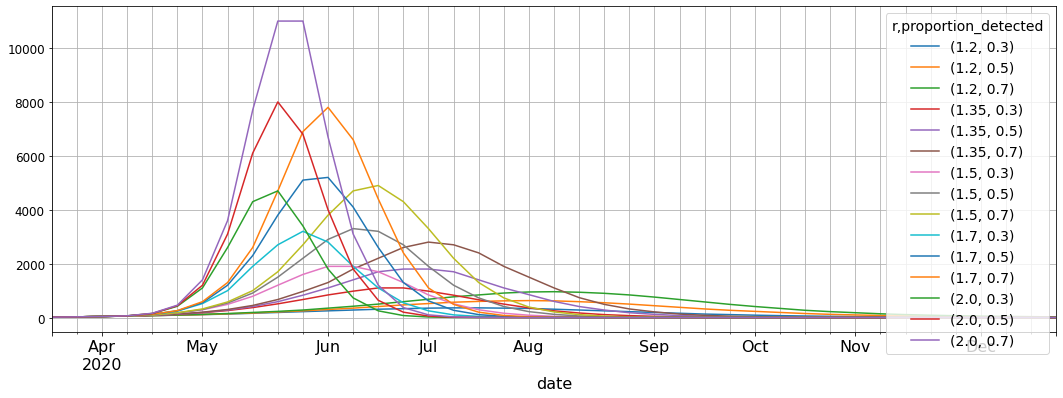

In [80]:
predictions_2.xs(('dead', 'new'), level=['patient', 'new_active'], axis=1).plot()

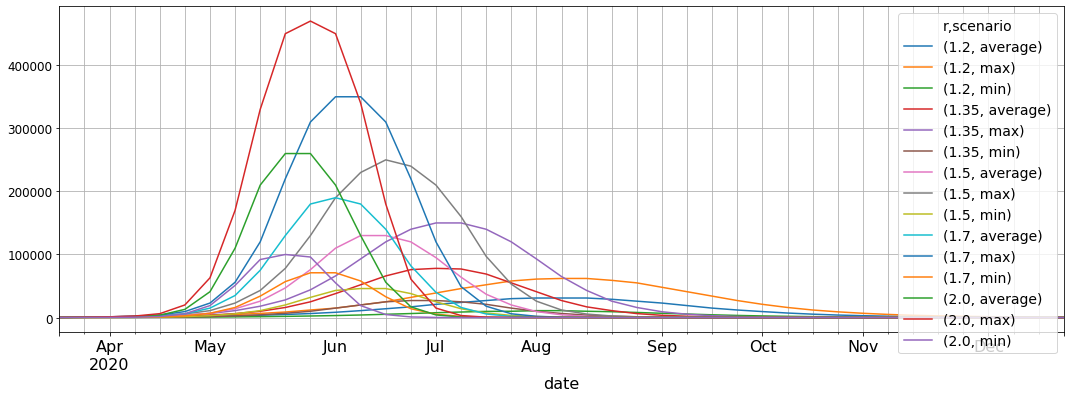

In [75]:
predictions_1.xs(('moderate_severe', 'active'), level=['patient', 'new_active'], axis=1).plot()

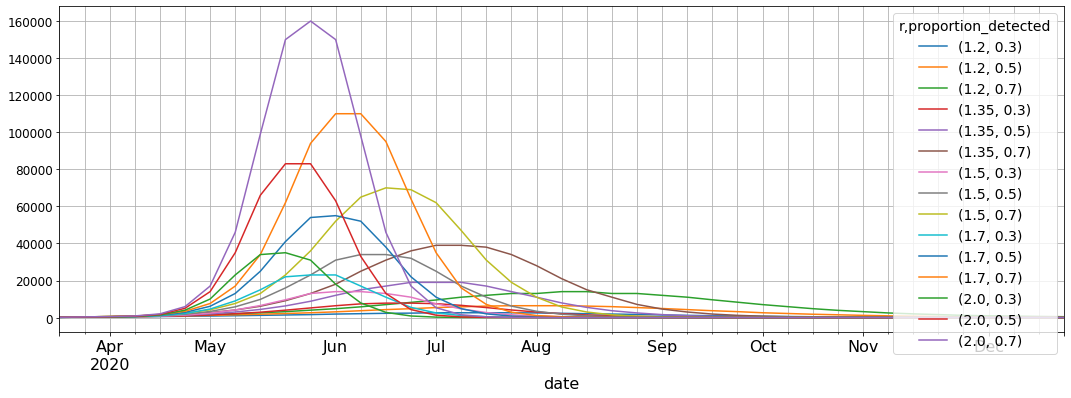

In [76]:
predictions_2.xs(('moderate_severe', 'active'), level=['patient', 'new_active'], axis=1).plot()

In [109]:
(confirmed.moderate_tot + confirmed.severe_tot)

2020-02-21      NaN
2020-02-22      NaN
2020-02-23      NaN
2020-02-24      NaN
2020-02-25      NaN
2020-02-26      NaN
2020-02-27      NaN
2020-02-28      NaN
2020-02-29      NaN
2020-03-01      NaN
2020-03-02      NaN
2020-03-03      NaN
2020-03-04      NaN
2020-03-05      NaN
2020-03-06      NaN
2020-03-07      NaN
2020-03-08      0.0
2020-03-09      2.0
2020-03-10      5.0
2020-03-11      6.0
2020-03-12      7.0
2020-03-13     11.0
2020-03-14     13.0
2020-03-15     14.0
2020-03-16     13.0
2020-03-17     15.0
2020-03-18     18.0
2020-03-19     19.0
2020-03-20     28.0
2020-03-21     34.0
2020-03-22     54.0
2020-03-23     67.0
2020-03-24     82.0
2020-03-25    103.0
2020-03-26    111.0
2020-03-27    112.0
2020-03-28    150.0
2020-03-29    156.0
2020-03-30    169.0
2020-03-31    199.0
2020-04-01    224.0
2020-04-02    234.0
2020-04-03    257.0
2020-04-04    291.0
2020-04-05    321.0
2020-04-06    337.0
2020-04-07    338.0
2020-04-08    346.0
2020-04-09    337.0
2020-04-10    335.0


Text(0.5, 1.0, 'תואיצמה םע תואירבה דרשמ תויזחת תאוושה :םיזפשואמ רפסמ')

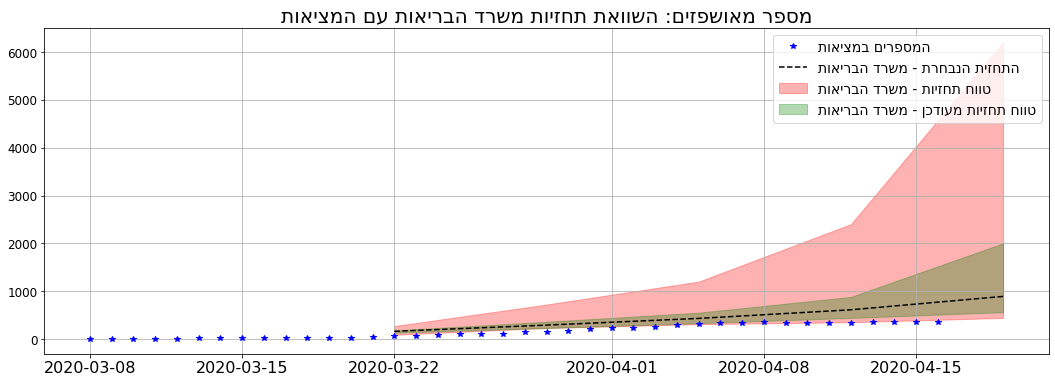

In [64]:
date_slice = slice(None, '2020/04/22')

fig, ax = plt.subplots()
ax.fill_between(predictions_1[date_slice].index, 
               predictions_1[date_slice][1.2]['min']['moderate_severe']['active'].values,
               predictions_1[date_slice][2]['max']['moderate_severe']['active'].values, alpha=0.3, color='red', label='טווח תחזיות - משרד הבריאות'[::-1])

ax.fill_between(predictions_1[date_slice].index, 
               predictions_2[date_slice][1.2][0.3]['moderate_severe']['active'].values,
               predictions_2[date_slice][2][0.7]['moderate_severe']['active'].values, alpha=0.3, color='green', label='טווח תחזיות מעודכן - משרד הבריאות'[::-1])

#(A.serious + A.critical).plot(ax=ax)
ax.plot(confirmed.index, (confirmed.moderate_tot + confirmed.severe_tot).values, linestyle='', marker='*', color='blue', label='המספרים במציאות'[::-1])
ax.plot(predictions_2[date_slice].index, predictions_2[date_slice][1.35][0.5]['moderate_severe']['active'], linestyle='--', color='black', label='התחזית הנבחרת - משרד הבריאות'[::-1])

ax.legend(loc='best')
ax.set_title('מספר מאושפזים: השוואת תחזיות משרד הבריאות עם המציאות'[::-1])
#('Hospitalized: comparing predictions and actual data')

In [149]:
confirmed.cases_tot - confirmed[['moderate_tot', 'severe_tot', 'dead_tot', 'recovered_tot']].sum(axis=1)

2020-02-21       2.0
2020-02-22       2.0
2020-02-23       2.0
2020-02-24       2.0
2020-02-25       2.0
2020-02-26       3.0
2020-02-27       5.0
2020-02-28       7.0
2020-02-29      10.0
2020-03-01      12.0
2020-03-02      12.0
2020-03-03      15.0
2020-03-04      16.0
2020-03-05      20.0
2020-03-06      22.0
2020-03-07      37.0
2020-03-08      39.0
2020-03-09      53.0
2020-03-10      72.0
2020-03-11      93.0
2020-03-12     120.0
2020-03-13     150.0
2020-03-14     183.0
2020-03-15     235.0
2020-03-16     301.0
2020-03-17     395.0
2020-03-18     495.0
2020-03-19     644.0
2020-03-20     795.0
2020-03-21     872.0
2020-03-22    1115.0
2020-03-23    1447.0
2020-03-24    1866.0
2020-03-25    2297.0
2020-03-26    2826.0
2020-03-27    3214.0
2020-03-28    3573.0
2020-03-29    4013.0
2020-03-30    4463.0
2020-03-31    5141.0
2020-04-01    5692.0
2020-04-02    6344.0
2020-04-03    6878.0
2020-04-04    7228.0
2020-04-05    7770.0
2020-04-06    7991.0
2020-04-07    8227.0
2020-04-08   

In [ ]:
con

Text(0.5, 1.0, 'תואיצמה םע תואירבה דרשמ תויזחת תאוושה :םירקמ רפסמ')

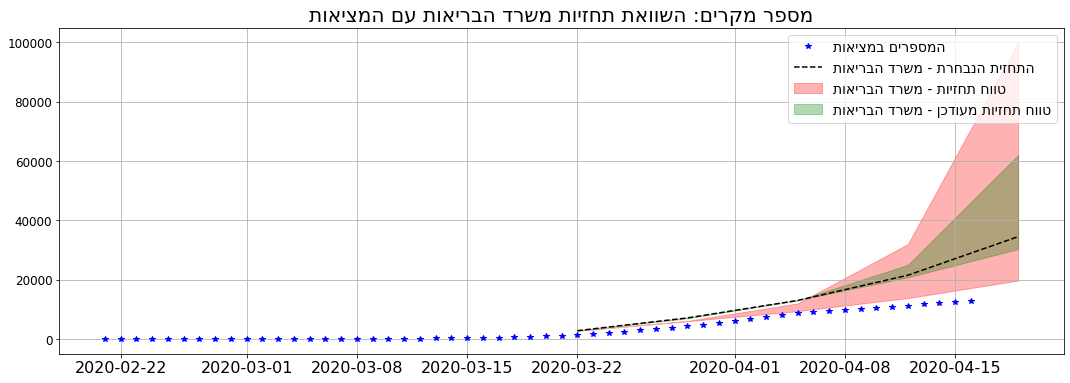

In [65]:
date_slice = slice(None, '2020/04/22')

fig, ax = plt.subplots()
ax.fill_between(predictions_1[date_slice].index, 
               predictions_1[date_slice][1.2]['min']['symptomatic']['new'].cumsum().values,
               predictions_1[date_slice][2]['max']['symptomatic']['new'].cumsum().values, alpha=0.3, color='red', label='טווח תחזיות - משרד הבריאות'[::-1])

ax.fill_between(predictions_1[date_slice].index, 
               predictions_2[date_slice][1.2][0.3]['symptomatic']['new'].cumsum().values,
               predictions_2[date_slice][2][0.7]['symptomatic']['new'].cumsum().values, alpha=0.3, color='green', label='טווח תחזיות מעודכן - משרד הבריאות'[::-1])

#(A.serious + A.critical).plot(ax=ax)
ax.plot(confirmed.index, (confirmed.cases_tot).values, color='blue', linestyle='', marker='*', label='המספרים במציאות'[::-1])
ax.plot(predictions_2[date_slice].index, predictions_2[date_slice][1.35][0.5]['symptomatic']['new'].cumsum().values, linestyle='--', color='black', label='התחזית הנבחרת - משרד הבריאות'[::-1])

ax.legend(loc='best')
ax.set_title('מספר מקרים: השוואת תחזיות משרד הבריאות עם המציאות'[::-1])
#('Cases: comparing predictions and actual data')
#מקרים

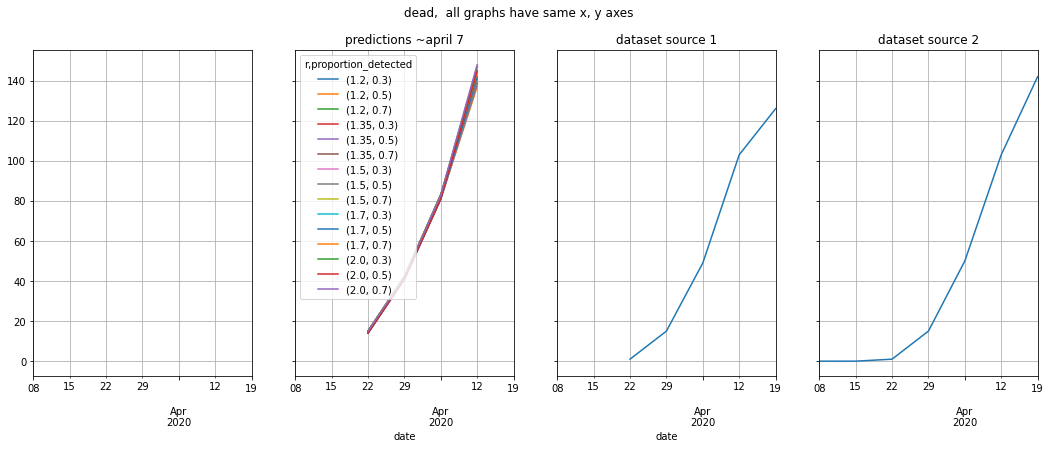

In [77]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True)
fig.suptitle('dead,  all graphs have same x, y axes')
#predictions_1[:'2020/04/15'].xs(['dead', 'new'], level=['patient', 'new_active'], axis=1).cumsum(axis=0).plot(ax=axes[0], title='predictions ~april 2')
predictions_2[:'2020/04/15'].xs(['dead', 'new'], level=['patient', 'new_active'], axis=1).cumsum(axis=0).plot(ax=axes[1], title='predictions ~april 7')
A.dead.plot(ax=axes[2], title='dataset source 1')
confirmed.dead_tot.plot(ax=axes[3], title='dataset source 2')


In [111]:
ax.xaxis

In [112]:
_.get_data_interval()

array([737506., 737527.])

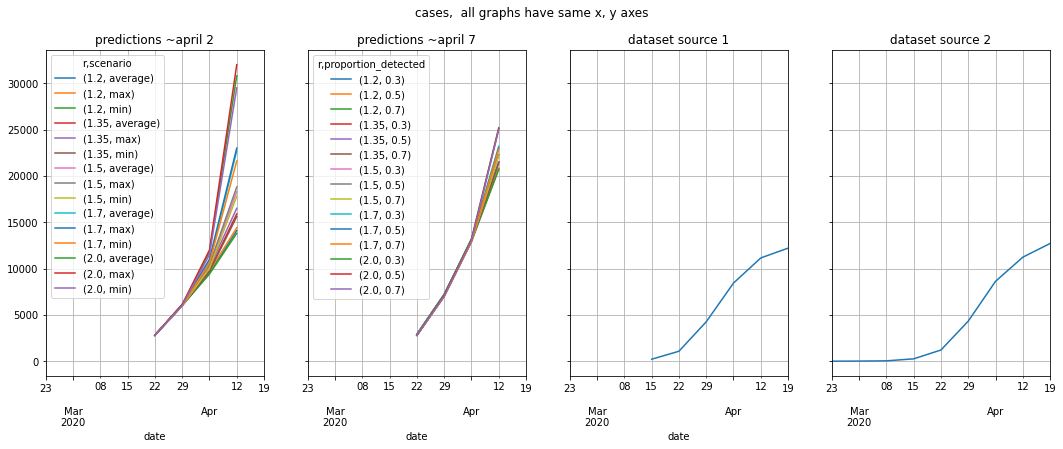

In [80]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True)
fig.suptitle('cases,  all graphs have same x, y axes')
predictions_1[:'2020/04/15'].xs(['symptomatic', 'new'], level=['patient', 'new_active'], axis=1).cumsum(axis=0).plot(ax=axes[0], title='predictions ~april 2')
predictions_2[:'2020/04/15'].xs(['symptomatic', 'new'], level=['patient', 'new_active'], axis=1).cumsum(axis=0).plot(ax=axes[1], title='predictions ~april 7')
A.total_cases.plot(ax=axes[2], title='dataset source 1')
confirmed.cases_tot.plot(ax=axes[3], title='dataset source 2')

In [62]:
confirmed.columns

Index(['cases_tot', 'cases_new', 'moderate_tot', 'severe_tot', 'dead_tot',
       'recovered_tot'],
      dtype='object')

In [63]:
A.columns

Index(['total_cases', 'mild', 'serious', 'critical', 'recovering', 'dead',
       'date'],
      dtype='object')

In [71]:
predictions_1.columns

MultiIndex([( 1.2, 'average', 'moderate_severe',    'new'),
            ( 1.2, 'average', 'moderate_severe', 'active'),
            ( 1.2, 'average',      'respirator',    'new'),
            ( 1.2, 'average',      'respirator', 'active'),
            ( 1.2, 'average',     'symptomatic',    'new'),
            ( 1.2,     'max', 'moderate_severe',    'new'),
            ( 1.2,     'max', 'moderate_severe', 'active'),
            ( 1.2,     'max',      'respirator',    'new'),
            ( 1.2,     'max',      'respirator', 'active'),
            ( 1.2,     'max',     'symptomatic',    'new'),
            ( 1.2,     'min', 'moderate_severe',    'new'),
            ( 1.2,     'min', 'moderate_severe', 'active'),
            ( 1.2,     'min',      'respirator',    'new'),
            ( 1.2,     'min',      'respirator', 'active'),
            ( 1.2,     'min',     'symptomatic',    'new'),
            (1.35, 'average', 'moderate_severe',    'new'),
            (1.35, 'average', 'moderate_

In [72]:
predictions_1

r                      1.2                                       \
scenario           average                                        
patient    moderate_severe        respirator        symptomatic   
new_active             new active        new active         new   
date                                                              
2020-03-22             150    180         44     50        2800   
2020-03-29             300    470         91    120        3200   
2020-04-05             320    730         97    170        3500   
2020-04-12             370    950        110    210        4600   
2020-04-19             500   1200        150    260        6200   
2020-04-26             670   1500        200    340        8300   
2020-05-03             900   2000        270    460       11000   
2020-05-10            1200   2700        360    610       15000   
2020-05-17            1600   3700        490    820       20000   
2020-05-24            2100   4900        640   1100       26000   
2020-05-31            2800   6400        840   1400       34000   
2020-06-07            3600   8400       1100   1900       43000   
2020-06-14            4600  11000       1400   2400       54000   
2020-06-21            5800  14000       1700   3000       66000   
2020-06-28            7000  17000       2100   3700       79000   
2020-07-05            8300  21000       2500   4500       90000   
2020-07-12            9400  24000       2800   5200      100000   
2020-07-19           10000  27000       3100   5800      100000   
2020-07-26           11000  30000       3200   6200      110000   
2020-08-02           11000  31000       3200   6300      100000   
2020-08-09            9900  31000       3000   6300       92000   
2020-08-16            8900  31000       2700   6100       81000   
2020-08-23            7700  29000       2300   5600       68000   
2020-08-30            6400  26000       1900   5000       55000   
2020-09-06            5100  23000       1500   4200       44000   
2020-09-13            4000  19000       1200   3500       34000   
2020-09-20            3100  15000        930   2800       26000   
2020-09-27            2300  12000        700   2200       19000   
2020-10-04            1800   9500        530   1700       14000   
2020-10-11            1300   7200        390   1300       11000   
2020-10-18             960   5400        290    940        7900   
2020-10-25             700   4000        210    690        5700   
2020-11-01             510   3000        150    510        4200   
2020-11-08             370   2200        110    370        3000   
2020-11-15             270   1600         81    270        2200   
2020-11-22             200   1200         59    200        1600   
2020-11-29             140    850         43    140        1200   
2020-12-06             100    620         31    100         840   
2020-12-13              75    450         22     76         610   
2020-12-20              54    320         16     55         440   
2020-12-27              39    230         12     39         320   

r                                                                ...  \
scenario               max                                       ...   
patient    moderate_severe        respirator        symptomatic  ...   
new_active             new active        new active         new  ...   
date                                                             ...   
2020-03-22             220    270         59     71        2800  ...   
2020-03-29             460    720        120    190        3300  ...   
2020-04-05             480   1200        130    310        3600  ...   
2020-04-12             560   1700        150    400        4700  ...   
2020-04-19             750   2200        200    480        6400  ...   
2020-04-26            1000   2800        270    620        8600  ...   
2020-05-03            1400   3700        360    830       12000  ...   
2020-05-10            1800   4900        480   1100  

In [99]:
mortality_per_1000 = pd.read_csv(path_data.joinpath('demographycs/mortality_per_1000.csv'), skiprows=[0,], index_col=0)
mortality_per_1000 = mortality_per_1000['CIA WF 2017']

In [100]:
corona_mortality = pd.read_csv(path_data.joinpath('demographycs/corona_mortality.csv'), skiprows=[0,], index_col=0)
corona_mortality_per_1000 = corona_mortality['Deaths per million'] / 1000

In [101]:
corona_mortality_per_1000 / mortality_per_1000

country
Afghanistan               0.000072
Albania                   0.001402
Algeria                   0.002109
AmericanSamoa                  NaN
Andorra                        NaN
                            ...   
WestBankandGaza                NaN
WesternSahara(Sahrawi)         NaN
Yemen                          NaN
Zambia                    0.000014
Zimbabwe                  0.000021
Length: 243, dtype: float64

In [102]:
mortality_per_1000.index

Index(['Afghanistan', 'Albania', 'Algeria', 'AmericanSamoa', 'Andorra',
       'Angola', 'Anguilla(UK)', 'AntiguaandBarbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'WallisandFutuna(France)', 'WesternSahara(Sahrawi)', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=232)

In [103]:
corona_mortality_per_1000.index

Index(['Belgium', 'Spain', 'Italy', 'France', 'UnitedKingdom', 'Netherlands',
       'Switzerland', 'Sweden', 'Ireland', 'UnitedStates',
       ...
       'Syria', 'Zambia', 'Uzbekistan', 'Libya', 'Nigeria', 'Malawi',
       'Burundi', 'Benin', 'Angola', 'Ethiopia'],
      dtype='object', name='country', length=134)